In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("../data/Employee_Salary_Dataset.csv")

In [ ]:
# Outlier removal
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]
print(f"Rows after outlier removal: {len(df)}")

Rows after outlier removal: 1000


In [ ]:
# Encoding
from sklearn.preprocessing import LabelEncoder
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])

In [ ]:
# Features
X = df.drop(columns=['ID', 'Salary']).values
y = df['Salary'].values

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [8]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=100, random_state=0)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [9]:
# Accuracy metrics
from sklearn.metrics import mean_absolute_error, r2_score
print("RandomForestRegressor:")
print("  MAE:", mean_absolute_error(y_test, y_pred_rf))
print("  R^2:", r2_score(y_test, y_pred_rf))

RandomForestRegressor:
  MAE: 13660.479649631712
  R^2: 0.9978846990626336


In [10]:
print("GradientBoostingRegressor:")
print("  MAE:", mean_absolute_error(y_test, y_pred_gb))
print("  R^2:", r2_score(y_test, y_pred_gb))

GradientBoostingRegressor:
  MAE: 13236.802790550157
  R^2: 0.9980193731720329


Text(0.5, 1.0, 'Random Forest')

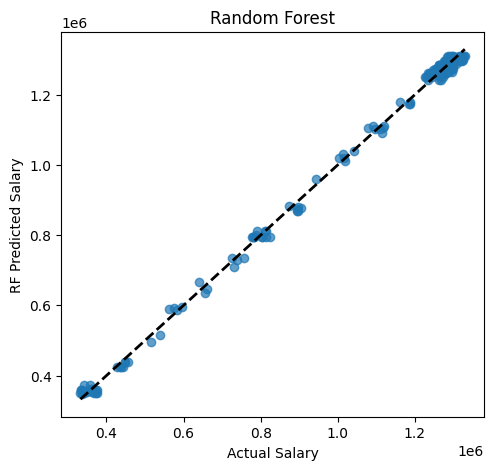

In [11]:
# Plot predicted vs actual for both models
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Salary")
plt.ylabel("RF Predicted Salary")
plt.title("Random Forest")

Text(0.5, 1.0, 'Gradient Boosting')

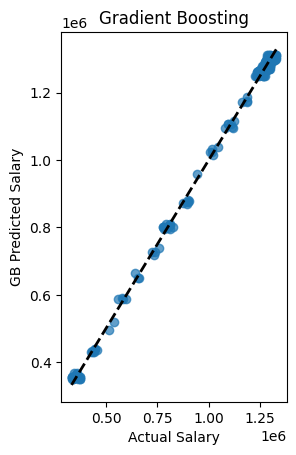

In [12]:
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_gb, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Salary")
plt.ylabel("GB Predicted Salary")
plt.title("Gradient Boosting")